In [15]:
# import library for manipulate with data
import numpy as np
import pandas as pd

# library for create 3D plot from our data
import matplotlib.pyplot as plt

1, Load the data set
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [16]:
# import our data set
df = pd.read_csv('irisData.csv')
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


2, Plot the first 3 columns of the data set and target column in 3d scatter plot.

HINT: Use the target column as a hue for the points.

LINK: [https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

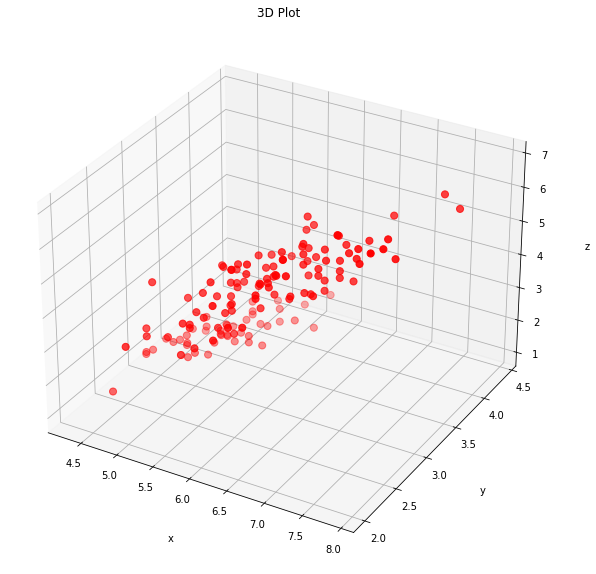

In [17]:
x = df['sepal.length']
y = df['sepal.width']
z = df['petal.length']

# set the size for diplaying 
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.grid()

ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Plot')

# Set axes label
ax.set_xlabel('x', labelpad = 20)
ax.set_ylabel('y', labelpad = 20)
ax.set_zlabel('z', labelpad = 20)

plt.show()

3, Copy the implementation of the Principal Component Analysis algorithm from SMLH.

In [18]:
class myPCA: 
    def __init__(self, n_components: int = 2 , method : str = 'svd')-> None:
        ''' The constructor of the PCA algorithm. :param n_compoents: int, default = 2 
            The dimension to which the data will be reduced. :param method: str, default = ’svd’ 
            The method used by PCA to reduce the dimensionality of the data. ''' 
        self.__n_components = n_components 
        if method in ['svd', 'eigen']: 
            self.__method = method 
        else: raise ValueError(f"'{method}' is not a method implemented in this model") 
  

    def fit(self, X : 'np.array'): 
        ''' The fitting method. 
            :param X: np.array 
            The data on which we want to fit the PCA '''
        if self.__method == 'svd': 
            U, S, V = np.linalg.svd(X) 
            self.__V = V[:self.__n_components, :] 
        
        elif self.__method == 'eigen': 
            corr_mat = np.corrcoef(X.T)
            
            # Getting the eigenvectors and eigenvalues self.eig_vals, 
            self.eig_vecs = np.linalg.eig( corr_mat) 
            
            # Sorting the list of tuples (eigenvalue, eigenvector) 
            self.eig_pairs = [(np.abs(self.eig_vals[i]), 
            self.eig_vecs[:, i]) for i in range(len(self.eig_vals))] 
            self.eig_pairs.sort(key = lambda x: x[0], reverse = True) 
    
            # Calculating the explained ration 
            total = sum(self.eig_vals) 
            self.explained_variance_ratio = [(i / total) * 100 
                                             
                                             
    for i in sorted(self.eig_vals, reverse = True)] 
            self.cumulative_variance_ratio = np.cumsum( 
                self.explained_variance_ratio
            ) 
            
            # Creating the projection matrix 
            self.matrix_w = np.hstack(
                (self.eig_pairs[i][1].reshape(np.size(X, 1), 1) 
                for i in range(self.__n_components))) 
        return self 
    
    def transform(self, X : 'np.array') -> 'np.array': 
        ''' The transform function. 
        :param X: np.array The data that we must reduce. ''' 
        if self.__method == 'svd': 
            return X.dot(self.__V.T) 
        elif self.__method == 'eigen': 
            return X.dot(self.matrix_w)

In [36]:
# set the values of white Setosa = 1, Versicolor = 2, Virginica = 0 
def flowers_to_number(x):
    if x == "Setosa":
        return 1
    if x == "Versicolor":
        return 2
    if x == "Virginica":
        return 0

df['variety'] = df["variety"].map(flowers_to_number)

In [38]:
print(df['variety'])

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: variety, Length: 150, dtype: int64


In [39]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

4, Create an instance of the Scratch made PCA algorithm using the eigenvector algorithm.

In [42]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [44]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [45]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [46]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


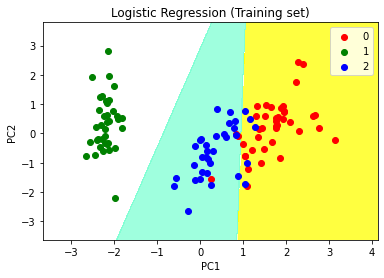

In [50]:
# Predicting the training set
# result through scatter plot
# Setosa = 1, Versicolor = 2, Virginica = 0 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                    stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                    stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
    X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
    cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


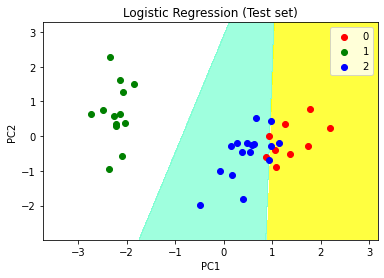

In [48]:
# Visualising the Test set results through scatter plot
# Setosa = 1, Versicolor = 2, Virginica = 0 
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                    stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                    stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
        X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
        cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


In [52]:
from numpy.linalg import eig

a = np.array(
    [[0, 2],
    [2, 3]] )

w, v = eig(a)
print(f'E-value: {w}')
print(f'E-vector: {v}')

E-value: [-1.  4.]
E-vector: [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


5, Create an instance of the Scratch made PCA algorithm using the SVD algorithm.

In [53]:
# adapate book SVD
# Creating the projection matrix 
matrix_w = np.hstack((eig_pairs[i][1].reshape(np.size(X, 1) ,1) for i in range(n_components)))

U, S, V = np.linalg.svd(X)
V = V[ :n_components, :]
new_X = np.dot(X, V.T)

NameError: name 'n_components' is not defined

6, Create an instance of sklearn and implement a PCA algorithm.

In [ ]:
 - call SKLEARN book

7, Apply StandardScaler from sklearn on the data.

In [ ]:
- penultimul cap din carte 

8, Train all created instances of PCA on the iris data.

In [ ]:
dataset iris implement PCA

9, Use each created instance of PCA to reduce the dimensionality of the data set to 2, creating in such a way 3 separated data sets.

In [ ]:
compontete 2, create new data set - colonae auto select by PCA = 3 col

10, Create a plot that combines 3 scatter plots and plots each of the result data sets in a separate window. Each window should related which version of the PCA was used.
HINT: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

11, Try to make a conclusion about what you see comparing the results of each algorithm and the 3d scatter plot that you made before.

In [ ]:
- analizare plot

12, Retrain a sklearn PCA model on the iris data set with n_components set to 1.

In [ ]:
reantrenare n_comp = 1

13, Create a line plot of the **explained_variance_ratio_.**

In [ ]:
plot linear = explained = n_competntssss

14, Try to make a conclusion based on that plot.

In [ ]:
conclus 